# Short Circuit 1: Season 1 Election Notes

>**FORBIDDEN KNOWLEDGE WARNING**
>
>This document contains some information that is not currently present on the main site and may be considered spoilers.
>Continue at your own discretion. Some information in this document cannot be shared on the main Blaseball Discord without spoiler tags.

Election analysis notebooks forked from Edgarware of the Pies, who has been doing this for ages. Thanks to him for a bunch of help getting this all set up. If you're curious, his are at https://edgarware.github.io/blaseball_notebooks/.

This version contains somewhat more opinionated analysis than its predecessors, to let it be my full election analysis all in one place. Trying stuff out.

**Current stats are at the end**, in the form of screenshots of my extremely scuffed blaseball-reference stand-in spreadsheets.

In [1]:
import pandas
%matplotlib inline
from blaseball_mike.models import *
from blaseball_mike.tables import StatType
import plotly.express as plot
import plotly.io as _pio
import plotly.subplots as subplot
from IPython.display import display, Markdown
from copy import deepcopy

import os
import sys
pdir = os.path.abspath(os.path.join(os.path.dirname(''), os.path.pardir))
sys.path.append(pdir)
from display import *
from blessings import *
sys.path.remove(pdir)

_pio.renderers.default = "notebook_connected"

league = League.load()
crabs = [x for x in league.teams.values() if x.full_name == "Baltimore Crabs"][0]

sim = SimulationData.load()
display(Markdown(f"**Last Updated Season {sim.season}, Day {sim.day}**"))


def sum_adj(adjustments):
    totals = {}
    for entry in adjustments:
        stat = StatType(entry['stat']).stat_name
        totals[stat] = totals.get(stat, 0) + entry['value']
    return totals

**Last Updated Season 1, Day 76**

---
## Amplifications

Amplification are chosen by majority votes for each team. **Each team will receive `1` amplification.**


**More Muscles: Your Team's Lineup will receive a Small Batting Boost.**
```
"metadata":{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":0,"sprinkleAmount":300}
```
**More Fingers: Your Team's Rotation will receive a Small Pitching Boost.**
```
"metadata":{"sourceLocation":[1],"playerSelection":-1,"sprinkleTarget":1,"sprinkleAmount":200}
```
**More Toes: Your Team's Lineup will receive a Large Baserunning Boost.**
```
"metadata":{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":3,"sprinkleAmount":500}
```
**More Eyes: Your Team's Lineup will receive a Large Defense Boost.**
```
"metadata":{"sourceLocation":[0],"playerSelection":-1,"sprinkleTarget":2,"sprinkleAmount":500}
```
All the Amplifications will boost team-wide stats in one area. The difference between "Small" and "Large" seems to be in what the metadata calls `sprinkleAmount`. This implies that pitching is, in some sense, the smallest boost, but it's not really know how exactly this works yet. For instance, if they randomly "sprinkle" 300 tiny boosts over the lineup's hitting, then that would be about 33 sprinkles per batter, versus about 40 sprinkles per pitcher for the pitching boost. But if it "sprinkles" 300 tiny boosts on each batter, then batting would be a "larger" boost than pitching.

If I figure out more from the test season feed, I'll add it here. According to Sam, who trawled that feed for information:
> 5 teams got more fingers with pitchers gaining between 0.3 and 0.9 stars each, and an 0.58 average pitching increase. 
Teams gained between 2.5 and 3.4 stars overall, with a 2.9 team average.

##### Analysis:

We shouldn't go for baserunning or defense boosts, they aren't worth it. I'm not sure which of hitting or pitching makes more sense. We really could use global buffs in both categories. **Either hitting or pitching, I'd say.**

---

## Distortions

Distortions are selected by raffle across all teams. Each distortion will be awarded to one random team, where teams with
more votes are more likely to be selected. **Teams may only receive at most 1 distortion.**

### Fire Blood

**Give a random Player in your Team's Rotation Fire Blood.**

Fire Blood grants the "Fiery" Modification which has the description "This Player has a chance of throwing Double
Strikes."

### Electric Blood

**Give a random Player in your Team's Rotation Electric Blood.**

Electric Blood grants the "Electric" Modification which has the description "When this Player is Pitching, they'll have
a chance of zapping away Balls."

### Strike Blood

**Give a random Player in your Team's Lineup Strike Blood.**

Strike is one of the 2 new bloods. We can infer from the feed that it gives the player the Fourth Strike modifier (strike out on 4 strikes instead of 3).

### Ball Blood

**Give a random Player in your Team's Lineup Ball Blood.**

Ball is one of the 2 new bloods. We can infer from the feed that it gives the player the Walk In The Park modifier (walk on 3 balls instead of 4).

##### Analysis:
All the bloods seem kind of nice, but would block us from getting better blessings if we win one, assuming the election works the same way as it used to work. **Meh?**

### Arm Cannon

**Give the Arm Cannon to a random Player in your Team's Rotation.**

This would award a random pitcher with the Arm Cannon Item. The Arm Cannon awarded in the gamma test seasons was, statwise, a "Literal Arm Cannon", and had the adjustments listed below.

##### Analysis:
This would make even Florian a really good pitcher, and would make the rest into monsters. **We should go for it.**

In [2]:
cannon = Item.load_one("6524fd18-54e1-4b51-be71-4db6ef1cdf42")
display(sum_adj(cannon.adjustments))

{'overpowerment': 0.9542536640830439,
 'unthwackability': 0.7362786936932654,
 'ruthlessness': 0.3073233290216612}

Crabs rotation if they got this exact item (obviously only one of them can get it, and it won't have these exact stats):


In [3]:
cannon_crabs = improve_team_arbitrary_rotation(crabs, sum_adj(cannon.adjustments))
display(set_heatmap(get_pitching_stlats(cannon_crabs), maxVal=1))

,Pitching Rating,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Florian Yuniesky,0.752866,0.831726,0.643193,1.160319,0.758964,0.671866,0.183792
Cara Yates,0.849257,1.053074,0.760491,1.576159,0.364843,0.151659,0.030520
Neon Singh,0.868619,1.732084,0.752010,1.676602,0.031514,0.264013,0.113404
Wanda Jenkins,1.092819,1.500650,1.184869,1.744309,0.085220,0.463127,0.342461
Cyrus Dalbec,0.984538,1.703515,1.015994,1.215763,0.067503,0.146464,0.531882


### Gunblade Bat

**Give the Gunblade Bat to a random Player in your Team's Lineup.**

This would award a random pitcher with the Gunblade Bat. The Gunblade Bat awarded in the gamma test seasons was, statwise, a "Bright Gunblade Bat of Dexterity", and had the adjustments listed below.

##### Analysis:
Do you like dingers? Whoever gets this will probably lead the league in home runs next season. **We should go for it.**

In [4]:
bat = Item.load_one("62fb21ab-1ef3-4c01-93a2-4d95325b1dab")
display(sum_adj(bat.adjustments))

{'thwackability': 0.5130641039787702,
 'divinity': 0.7269251670605504,
 'omniscience': 0.15027996064258692,
 'continuation': 0.11857006105026602,
 'cinnamon': 0.5548917066411219}

Crabs lineup if they got this exact item (obviously only one of them can get it, and it won't have these exact stats):

In [5]:
bat_crabs = improve_team_arbitrary_lineup(crabs, sum_adj(bat.adjustments))
display(set_heatmap(get_batting_stlats(bat_crabs), maxVal=1))

,Batting Rating,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Grapefruit Walnut,1.087122,1.442577,1.707487,0.510675,0.369663,0.778430,0.468064,0.806056,0.015862
Malachi Others,0.763170,0.901918,0.806432,0.274722,0.832672,0.122001,0.198976,0.609978,0.639789
Peyton Beech,1.003297,1.368302,1.289493,0.589303,0.395981,0.721642,0.650045,0.747131,0.799497
Shiloh Donjon,0.903709,0.937326,1.338940,0.524785,0.565744,0.766292,0.435873,0.037406,0.333031
Robby Hicks,0.886013,0.778845,1.697813,0.216121,0.517760,0.259310,0.355182,0.848012,0.753483
Scarlett Chadwell,0.862126,0.896479,1.257947,0.384111,0.840959,0.434545,0.082313,0.934263,0.536252
Amos Penny,1.092253,0.941293,1.559051,0.839827,0.761909,0.081481,0.923626,0.487476,0.203144
Iliad Offshore,0.916019,0.948919,1.349660,0.793645,0.820030,0.826071,0.254031,0.934379,0.497154
Lorcan Mondavi,0.696601,0.633604,1.163989,0.254729,0.291828,0.670819,0.842942,0.101033,0.699326


Also provides a boost to defense (omniscience) and baserunning (continuation), and a large vibes boost (cinnamon).

### Rocket Shoes

**Give Rocket Shoes to a random Player in your Team's Lineup.**

This would award a random batter with the Rocket Shoes Item. The Rocket Shoes awarded in the gamma test seasons was, statwise, a "Greedy Rocket Shoes of Stamina", and had the adjustments listed below.

##### Analysis:
This would be somewhat wasted on a player who sucks at getting on base, but on someone like Others or Hicks? Stolen bases galore. **This would be fun.**

In [6]:
shoes = Item.load_one("971353de-05f9-47b2-8c27-62b666f182af")
display(sum_adj(shoes.adjustments))

{'laserlikeness': 0.7352479438825257,
 'tenaciousness': 0.18846089786002318,
 'chasiness': 0.17397007472834686,
 'continuation': 0.36907020559415343,
 'base_thirst': 0.3980900812170812,
 'indulgence': 0.18520160996281987}

Crabs lineup if they got this exact item (obviously only one of them can get it, and it won't have these exact stats):

In [7]:
shoes_crabs = improve_team_arbitrary_lineup(crabs, sum_adj(shoes.adjustments))
display(set_heatmap(get_baserunning_stlats(shoes_crabs), maxVal=1))

,Baserunning Rating,Laserlikeness,Continuation,Base Thirst,Indulgence,Ground Friction
Grapefruit Walnut,0.898473,1.720598,0.716791,0.583741,1.154441,0.047062
Malachi Others,1.116518,1.664714,0.817479,0.655158,0.703544,0.624951
Peyton Beech,0.961163,1.207395,1.093967,0.686787,0.643627,0.542326
Shiloh Donjon,0.875095,1.392260,0.941937,0.570484,0.344227,0.272171
Robby Hicks,1.033384,1.538741,1.163415,1.133472,0.933305,0.130804
Scarlett Chadwell,0.745757,0.802570,1.334666,1.069073,0.401175,0.279155
Amos Penny,0.826942,0.883019,0.591174,0.952409,0.652767,0.757879
Iliad Offshore,0.793936,0.839292,1.050073,0.806389,0.354928,0.795032
Lorcan Mondavi,1.003872,1.311570,1.182349,0.398469,0.894902,0.635199


Also provides a boost to defense (tenaciousness and chasiness).

### Catcher's Mitt

**Give Catcher's Mitt to a random Player in your Team's Lineup.**

This would award a random batter with the Catcher's Mitt Item. The Catcher's Mitt awarded in the gamma test seasons was, statwise, a "Catcher's Frosty Glove of Wisdom", and had the adjustments listed below.

##### Analysis:
How does defense work anyway? Adding roughly 0.75 omniscience to the defense can't be bad, but is likely less important than the other items. If the election works like past ones have, this will be the last item to be assigned, so it can't block us from getting one of the others. **I wouldn't complain if we won this.**

In [8]:
mitt = Item.load_one("488be339-eee0-4b01-b6ce-717bee78237f")
display(sum_adj(mitt.adjustments))

{'omniscience': 0.7417557342177603,
 'tenaciousness': 0.5530520529042229,
 'watchfulness': 0.29585140345474525,
 'indulgence': 0.1362837137461368,
 'coldness': 0.11847071954893859,
 'chasiness': 0.25232444207782545}

Crabs lineup if they got this exact item (obviously only one of them can get it!):

In [9]:
mitt_crabs = improve_team_arbitrary_lineup(crabs, sum_adj(mitt.adjustments))
display(set_heatmap(get_defense_stlats(mitt_crabs), maxVal=1))

,Defense Rating,Omniscience,Tenaciousness,Watchfulness,Anticapitalism,Chasiness
Grapefruit Walnut,0.956486,1.286585,0.847809,1.256474,0.870688,0.492376
Malachi Others,0.882458,0.974224,0.983340,0.724794,0.714798,0.602308
Peyton Beech,0.865465,1.310841,0.849197,0.464998,0.636893,0.642483
Shiloh Donjon,0.979842,1.076738,1.351351,0.697528,0.677288,0.815583
Robby Hicks,1.005085,1.160390,1.528229,1.155263,0.368878,0.785019
Scarlett Chadwell,0.731666,0.814316,1.369807,0.851289,0.039716,1.045161
Amos Penny,0.949544,1.204660,1.154319,0.766787,0.419389,0.958246
Iliad Offshore,0.882355,1.295209,1.318550,0.393644,0.235217,1.059229
Lorcan Mondavi,0.797844,1.425105,0.999573,0.782143,0.229845,0.286509


Also provides a boost to baserunning (indulgence), and a boost to coldness (useless for batters).

### Lead Investment

**Move the Best Batter in your Team's Lineup to first in the Lineup.**

##### Analysis:
As of this writing (Thursday, 4:50pm ET), our "Best Batter" is already leadoff, so this would do nothing for us. **Avoid.**

In [10]:
temp_crabs = crabs.lineup.copy()
temp_crabs.sort(key=lambda x: x.get_hitting_rating(), reverse=True)
best_bat = temp_crabs[0]
display(f"Move {best_bat.name} to the first slot in the lineup.")
rest_of_them = [x for x in crabs.lineup if x.id != best_bat.id]
display(set_heatmap(get_batting_stlats([best_bat] + rest_of_them), maxVal=1.0))

'Move Grapefruit Walnut to the first slot in the lineup.'

,Batting Rating,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Grapefruit Walnut,0.767645,0.929512,0.980562,0.510675,0.369663,0.778430,0.468064,0.806056,0.015862
Malachi Others,0.252686,0.388854,0.079507,0.274722,0.832672,0.122001,0.198976,0.609978,0.639789
Peyton Beech,0.636665,0.855238,0.562568,0.589303,0.395981,0.721642,0.650045,0.747131,0.799497
Shiloh Donjon,0.520642,0.424262,0.612015,0.524785,0.565744,0.766292,0.435873,0.037406,0.333031
Robby Hicks,0.500107,0.265781,0.970888,0.216121,0.517760,0.259310,0.355182,0.848012,0.753483
Scarlett Chadwell,0.473558,0.383415,0.531021,0.384111,0.840959,0.434545,0.082313,0.934263,0.536252
Amos Penny,0.665535,0.428229,0.832125,0.839827,0.761909,0.081481,0.923626,0.487476,0.203144
Iliad Offshore,0.532196,0.435855,0.622734,0.793645,0.820030,0.826071,0.254031,0.934379,0.497154
Lorcan Mondavi,0.276600,0.120539,0.437064,0.254729,0.291828,0.670819,0.842942,0.101033,0.699326


### Default Swap

**Swap the Worst Batter in your Team's Lineup with the Worst Pitcher in your Team's Rotation.**

##### Analysis:
This would be an improvement by primary stars, but I don't really like it when we look at real performance.
Pitchers with terrible Ruthlessness (like Malachi) do pretty badly, so we might not really benefit on the pitching side. On the hitting side, I think it's just a downgrade. Malachi actually gets on base well. They lead the team in walks, and are second in stolen bases. Their OPS is actually third on the team! Florian looks like a somewhat worse version of Grapefruit Walnut, whose OPS is 50 points worse than Malachi's. **Avoid.**

In [11]:
worst_batter = sort_lineup(crabs, num=1)[0]
worst_pitcher = sort_rotation(crabs, num=1)[0]
display(f"Swap {worst_batter.name} to rotation and {worst_pitcher.name} to lineup.")
display(pandas.DataFrame(swap_players(crabs, worst_pitcher, worst_batter)))

display(set_heatmap(get_pitching_stlats([worst_pitcher, worst_batter]), maxVal=1.0))

display(set_heatmap(get_batting_stlats([worst_batter, worst_pitcher]), maxVal=1.0))

'Swap Malachi Others to rotation and Florian Yuniesky to lineup.'

,Crabs
batting_change,+2.5858%
pitching_change,+3.0294%
baserunning_change,-3.8634%
defense_change,-1.6882%


,Pitching Rating,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Florian Yuniesky,0.151759,0.095448,0.335870,0.206065,0.758964,0.671866,0.183792
Malachi Others,0.303231,0.654115,0.099922,0.876088,0.733893,0.700616,0.581396


,Batting Rating,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Malachi Others,0.252686,0.388854,0.079507,0.274722,0.832672,0.122001,0.198976,0.609978,0.639789
Florian Yuniesky,0.485411,0.807900,0.304146,0.762969,0.568091,0.800711,0.015834,0.408390,0.501349


### Cold Call

**Call the Alternate for the 2 Worst Pitchers in your Team's Rotation.**

An Alternate is a reroll of the player's stats. It is unknown if it will maintain combined star total similarly to later Expansion Era Alternates, though it seems like the test season rerolls in the feed didn't decrease star totals.
This should also reroll players if they are still the worst player after their first reroll.
See below for the list of players this would reroll. For reference, the statistical average reroll would have ~1.5
pitching stars (or ~0.3 Pitching Rating).

##### Analysis:
Could work. Could always create another Rebecca McCloud, but that would at least be funny. Florian's star total is 6.7, and Cara's is 10.6. **We could try it.**

In [12]:
display(set_heatmap(get_pitching_stlats(sort_rotation(crabs, 2)), maxVal=1.0))

,Pitching Rating,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Florian Yuniesky,0.151759,0.095448,0.335870,0.206065,0.758964,0.671866,0.183792
Cara Yates,0.329370,0.316795,0.453167,0.621905,0.364843,0.151659,0.030520


### Long Distance Call

**Call the Alternate for the 4 Worst Batters in your Team's Lineup.**

An Alternate is a reroll of the player's stats. It is unknown if it will maintain combined star total similarly to later Expansion Era Alternates, though it seems like the test season rerolls in the feed didn't decrease star totals. This should also reroll players if they are still the worst player after their first reroll.
See below for the list of players this would reroll. For reference, the statistical average reroll would have ~2 batting
stars (or ~0.4 Batting Rating).

##### Analysis:
Lorcan is the only one of these players I'd want to reroll. **Avoid.**

In [13]:
display(set_heatmap(get_batting_stlats(sort_lineup(crabs, 4)), maxVal=1.0))

,Batting Rating,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Malachi Others,0.252686,0.388854,0.079507,0.274722,0.832672,0.122001,0.198976,0.609978,0.639789
Lorcan Mondavi,0.276600,0.120539,0.437064,0.254729,0.291828,0.670819,0.842942,0.101033,0.699326
Scarlett Chadwell,0.473558,0.383415,0.531021,0.384111,0.840959,0.434545,0.082313,0.934263,0.536252
Robby Hicks,0.500107,0.265781,0.970888,0.216121,0.517760,0.259310,0.355182,0.848012,0.753483



---
## Current Performance Statistics
(Through game 77)

Pitching, sorted by ERA:
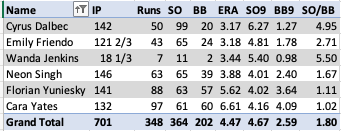

Batting, sorted by OPS:
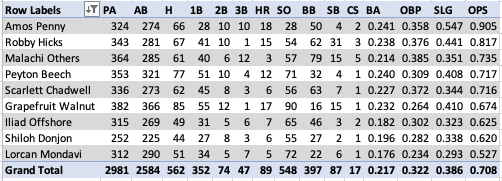


---
## Appendix
* [Description of Attributes](https://www.blaseball.wiki/w/Player_Attributes)
* [Stlat Viewer](http://yoori.space/astrology/#baltimore-crabs-gamma)
* [Historical Player Graphs](http://yoori.space/hloroscopes/)